### Analysis on new_judge dataset by Anton Njavro
### CS506 Group

In [122]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

In [123]:
#Import new_judge_Data
sjc_draft = pd.read_csv('sjc_draft.csv')
new_sjc_draft = sjc_draft[317:]
judges_fill = pd.read_csv('judge_fill.csv')
jud=judges_fill['judge']
new_judge_data=new_sjc_draft.assign(judge=jud.values)

In [124]:
# get is reversed
yesls=[317,322,324,326,327,330,333,338,341,343,344,352,354,370,373,374,376,384,386,388,394,395,407,411,412,414,417,419,422,423,425,426,428,430,432,436,438,441,463,465,470,471,473,475,484,487,493,499,500,501,505,506,509,515,516,545,549,550,554,558,566,568,575,576,577,579,580,581,585,586,590,591,595,596,599,600,613,619,620,625,628,631,643]
nols=[318,319,320,323,325,328,329,331,332,335,336,337,339,340,342,345,346,347,348,349,350,353,356,358,359,361,362,364,365,366,367,368,369,371,372,375,377,378,379,380,381,382,383,389,390,391,392,393,396,397,398,399,400,401,402,403,404,405,406,408,410,413,415,416,418,420,421,424,427,433,434,437,435,439,440,442,443,444,445,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,464,466,467,468,469,472,474,476,477,478,479,480,481,482,483,485,486,488,489,490,491,492,494,495,496,497,498,502,503,504,507,508,511,512,513,514,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,546,547,548,551,552,555,556,557,559,561,562,563,564,565,567,569,570,571,572,573,574,578,582,583,584,587,588,589,592,594,597,598,601,602,603,604,605,606,607,608,609,610,611,612,614,615,616,617,618,621,622,624,626,627,629,630,632,635,636,637,638,640,642,644]
parls=[321,334,351,355,357,360,363,385,387,409,429,431,446,510,553,560,593,623,633,634,639,641,645]
#Add case status
for i in yesls:
    new_sjc_draft.at[i,'appealed']='Yes'
for i in nols:
    new_sjc_draft.at[i,'appealed']='No'
for i in parls:
    new_sjc_draft.at[i,'appealed']='Partially'
judges_fill = pd.read_csv('judge_fill.csv')
jud=judges_fill['judge']
new_judge_data=new_sjc_draft.assign(judge=jud.values)

In [125]:
new_judge_data.head(5)

,cases,headnote,text,type,caseid,appealed,judge
317,in the matter of e.c.,"sjc-12230incompetent person, commitment. prac...","in this appeal, we consider whether the dismis...",criminal,sjc-12230,Yes,Not Mentioned
318,commonwealth vs. joseph wright.,"sjc-11950homicide. constitutional law, admiss...","the defendant, joseph wright, appeals from two...",criminal,sjc-11950,No,"Howard J. Whitehead, J."
319,"brian rafferty vs. merck & co., inc., & anot...","sjc-12347negligence, pharmaceutical manufactur...","under federal law, a manufacturer of a generic...",civil,sjc-12347,No,"Kenneth J. Fishman, J."
320,commonwealth vs. johnelle m. brown.,sjc-12313assault and battery. intimidation of...,a jury in the district court convicted the def...,criminal,sjc-12313,No,"Michele B. Hogan, J."
321,commonwealth vs. g.f.,"amended april 13, 2018. amended may 11, 2018.s...","this case concerns g. l. c. 123a, the statute ...",civil,NaN,Partially,Not Mentioned


In [126]:
type(new_judge_data.judge.value_counts()[1:])

pandas.core.series.Series

In [127]:
#Create dictionary with format {JudgeName:#OfCases}
#Save judges only with number of cases greater than 3
judge_dict = {}
judge_names = set()
for items in new_judge_data.judge.value_counts()[1:].iteritems(): 
    if items[1] > 3:
        judge_names.add(items[0])
        judge_dict[items[0]] = items[1]

In [128]:
judge_names

{'Barbara A. Lenk, J.',
 'Christine M. Roach, J.',
 'Daniel M. Wrenn, J.',
 'David A. Lowy, J.',
 'Douglas H. Wilkins, J.',
 'Elspeth B. Cypher, J.',
 'Frank M. Gaziano, J.',
 'Gary A. Nickerson, J.',
 'Heidi E. Brieger, J.',
 'Janet Kenton-Walker, J.',
 'Janet L. Sanders, J.',
 'Kenneth W. Salinger, J.',
 'Kimberly S. Budd, J.',
 'Linda E. Giles, J.',
 'Maynard M. Kirpalani, J.',
 'Peter M. Lauriat, J.',
 'Richard J. Carey, J.',
 'Scott L. Kafker, J.',
 'Thomas F. McGuire, Jr., J.'}

In [129]:
#Extract the dataset with judges that have 3< cases
#Length of reduced_new_judge_data is 108
reduced_new_judge_data = new_judge_data[new_judge_data['judge'].isin(judge_names)]

In [130]:
reduced_new_judge_data.head(5)

,cases,headnote,text,type,caseid,appealed,judge
326,care and protection of m.c.,"sjc-12339impoundment. minor, care and protect...","in this case, we consider the appropriate stan...",criminal,sjc-12339,Yes,"Barbara A. Lenk, J."
329,j.h. vs. commonwealth.,"sjc-12395juvenile court, delinquent child. pr...",a single justice of the county court reserved ...,criminal,sjc-12395,No,"Barbara A. Lenk, J."
332,exxon mobil corporation vs. attorney general.,sjc-12376attorney general. consumer protectio...,"in 2015, news reporters released internal docu...",civil,sjc-12376,No,"Heidi E. Brieger, J."
336,jane doe no. 1& othersvs. secretary of educat...,"sjc-12275education, charter school. education...",five students who attend public schools in the...,civil,sjc-12275,No,"Heidi E. Brieger, J."
348,commonwealth vs. marcelo almeida.,"sjc-12179homicide. evidence, prior misconduct...","the defendant, marcelo almeida, stabbed the vi...",criminal,sjc-12179,No,"Thomas F. McGuire, Jr., J."


In [131]:
#Replace columns 'appealed' with 'case status', and 'No'->'Affirm', 'Partially'->'Partially', 'Yes'->'Reverse'
def changeAppealed(input_string):
    if input_string == 'Yes':
        return 'Reverse'
    elif input_string == 'Partially':
        return 'Partially'
    elif input_string == 'No':
        return 'Affirm'

reduced_new_judge_data['case status'] = reduced_new_judge_data['appealed'].apply(changeAppealed)
del reduced_new_judge_data['appealed']

/Users/antonnjavro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [132]:
#Create list [number_of_reversed,number_of_affirmed,number_of_partial,total_number_of_cases] for each judge 
#in dict judge_count, with key being judge's name
judge_count = {}
for i, j in reduced_new_judge_data.iterrows():
    #print(j['judge'])
    #print(j['judge'])
    if j['judge'] not in judge_count:
        #print("{} is not yet in our dict.".format(j['judge']))
        #Create new entry for a judge
        #Check for all three cases
        if j['case status'] == 'Affirm':
            #Affirmed [0,1,0,1]
            judge_count[j['judge']] = [0,1,0,1]
        elif j['case status'] == 'Reverse':
            #Reverse [1,0,0,1]
            judge_count[j['judge']] = [1,0,0,1]
        elif j['case status'] == 'Partially':
            #Partially [0,0,1,1]
            judge_count[j['judge']] = [0,0,1,1]
    else:
        #Judge already in the dict, increment accordingly
        if j['case status'] == 'Affirm':
            #Affirmed [0,1,0,1]
            judge_count[j['judge']][1] += 1
            judge_count[j['judge']][-1] += 1
        elif j['case status'] == 'Reverse':
            #Reverse [1,0,0,1]
            judge_count[j['judge']][0] += 1
            judge_count[j['judge']][-1] += 1
        elif j['case status'] == 'Partially':
            #Partially [0,0,1,1]
            judge_count[j['judge']][2] += 1
            judge_count[j['judge']][-1] += 1
       

In [133]:
#Print out percentages
def print_stats(judge_name,given_judge):
    #We're given list of certain judge [number_of_reversed,number_of_affirmed,number_of_partial,total_number_of_cases]
    #Pct reversed:
    pct_reversed = round((given_judge[0]/given_judge[-1])*100,2)
    #Pct affirmed
    pct_affirmed = round((given_judge[1]/given_judge[-1])*100,2)
    #Pct partial
    pct_partial = round((given_judge[2]/given_judge[-1])*100,2)
    print("Judge {} has {}% of cases reversed, {}% of cases affirmed, and {}% of cases partially affirmed/reversed.".format(judge_name,pct_reversed,pct_affirmed,pct_partial))
    print()
    
    

for judge in judge_count:
    #Uncomment if you want to see percentages for each judge
    #print_stats(judge,judge_count[judge])
    pass

### Visualizations for new judges

In [134]:
len(judge_count)

19

In [135]:
#Create Dataframe with columns, name of judge and its statistics in order to graph it
judges_data = pd.DataFrame.from_dict(judge_count).transpose()
judges_data.rename(columns = {0:'Reversed',1:'Affirmed',2:'Partial',3:'Total'}, inplace = True)
#Sort data by number of cases
judges_data = judges_data.sort_values('Total',ascending=False)
judges_data

,Reversed,Affirmed,Partial,Total
"David A. Lowy, J.",0,13,1,14
"Frank M. Gaziano, J.",1,8,1,10
"Scott L. Kafker, J.",0,9,0,9
"Elspeth B. Cypher, J.",1,7,0,8
"Janet L. Sanders, J.",0,4,2,6
"Richard J. Carey, J.",2,4,0,6
"Heidi E. Brieger, J.",2,4,0,6
"Douglas H. Wilkins, J.",3,2,0,5
"Maynard M. Kirpalani, J.",0,4,0,4
"Gary A. Nickerson, J.",0,4,0,4


### Plotted graphs display numbers for affirmed/reversed/partial cases for all judges

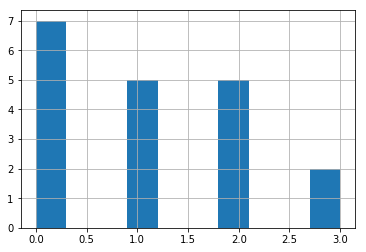

In [136]:
judges_data['Reversed'].hist()

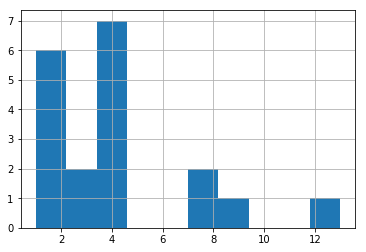

In [137]:
judges_data['Affirmed'].hist()

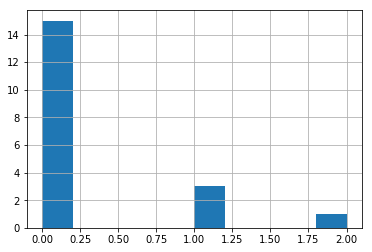

In [138]:
judges_data['Partial'].hist()

### Let's try to visualize numbers by judges, we will try to visualize only top 8 judges since visualizations for 19 is very unpractical

In [139]:
#Function to plot Pie-charts given series from pandas (only top 8)
def pie_chart(s):
    #Try to check if it's 0 and if it is remove it, and once removed take top 8
    s = s[s!=0]
    if len(s)>8:
        s[:8].plot.pie(y=df.index,shadow=False, startangle=90,autopct='%1.1f%%')
    else:
        s.plot.pie(y=df.index,shadow=False, startangle=90,autopct='%1.1f%%')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [140]:
affirmed_series = judges_data['Affirmed']
reversed_series = judges_data['Reversed']
partial_series = judges_data['Partial']
affirmed_series.head()

David A. Lowy, J.        13
Frank M. Gaziano, J.      8
Scott L. Kafker, J.       9
Elspeth B. Cypher, J.     7
Janet L. Sanders, J.      4
Name: Affirmed, dtype: int64

### Let's try to perform analysis on data from 2008-2018 about with our important judges from this dataset

In [160]:
#Load in data from 2008-2018
old_data = pd.read_csv('10yrs_civil_cases.csv')

In [161]:
old_data.head()

,Unnamed: 0,Case Id,Case Type,Case Name,Decision Date,Lower Ct Judge,case status
0,0,2008-P-0001,Civil,PETER G. HILL vs. JAMES LUKOWIAK,12/22/2008,"Bruce R. Henry, J.",Affirm
1,1,2008-P-1002,Civil,CASELLA WASTE MANAGEMENT OF MA vs. JOHN TAMBURO,05/04/2010,"David A. McLaughlin, J.",Affirm
2,2,2008-P-1006,Civil,FARMER & FLIER ASSOCIATES vs. GUILFORD TRANSPO...,07/15/2009,"Herman J. Smith, Jr., J.",Affirm
3,3,2008-P-1007,Civil,B.M. vs. J.C.,05/27/2009,"Judith Nelson Dilday, J.",Affirm
4,4,2008-P-1014,Civil,SOLANGE DASILVA vs. MICHAEL BERMAN,05/19/2009,"Thayer Fremont-Smith, J.",Affirm


In [162]:
#The overlap from 2008-2018 data and 2018-2019 data is 532. (There are 532 cases tried by our new judges)
old_data = old_data[old_data['Lower Ct Judge'].isin(judge_names)]

In [163]:
old_data['Lower Ct Judge'].value_counts()[1:]

Janet L. Sanders, J.          51
Peter M. Lauriat, J.          51
Douglas H. Wilkins, J.        46
Christine M. Roach, J.        41
Gary A. Nickerson, J.         38
Janet Kenton-Walker, J.       37
Heidi E. Brieger, J.          29
Daniel M. Wrenn, J.           27
Kimberly S. Budd, J.          26
Thomas F. McGuire, Jr., J.    25
Maynard M. Kirpalani, J.      22
Kenneth W. Salinger, J.       19
Frank M. Gaziano, J.          19
Richard J. Carey, J.          15
David A. Lowy, J.             13
Barbara A. Lenk, J.            7
Scott L. Kafker, J.            3
Elspeth B. Cypher, J.          3
Name: Lower Ct Judge, dtype: int64

In [164]:
#Take judges that have only more than 20 cases in 2008-2018 period
#There's 11 of them
old_judge_names = set()
old_judge_dict = {}
for items in old_data['Lower Ct Judge'].value_counts()[1:].iteritems(): 
    if items[1] > 20:
        old_judge_names.add(items[0])
        old_judge_dict[items[0]] = items[1]

In [165]:
(len(judge_names) - len(old_judge_names))

8

In [166]:
#There are 393 of cases by those 11 judges
reduced_old_data = old_data[old_data['Lower Ct Judge'].isin(old_judge_names)]

In [169]:
reduced_old_data.head()

,Unnamed: 0,Case Id,Case Type,Case Name,Decision Date,Lower Ct Judge,case status
149,149,2008-P-1525,Civil,SUZANNE BEATH vs. TIMOTHY NEE & another,06/23/2009,"Janet L. Sanders, J.",Affirm
178,178,2008-P-0168,Civil,JOSEPH W. GORDON vs. MASS REGISTRY OF MOTOR VE...,08/24/2009,"Gary A. Nickerson, J.",Affirm
189,189,2008-P-1723,Civil,COMMONWEALTH vs. GEORGE SOUZA,12/17/2009,"Gary A. Nickerson, J.",Affirm
204,204,2008-P-1780,Civil,HAROLD WENGER vs. GREGORY J. ACETO,07/24/2009,"Janet L. Sanders, J.",Affirm
245,245,2008-P-1922,Civil,UNITED CO-OPERATIVE FARMERS INC vs. JOHN ARO &...,10/13/2009,"Christine M. Roach, J.",Reverse


In [174]:
old_judge_count = {}
for i, j in reduced_old_data.iterrows():
    #print(j['judge'])
    #print(j['judge'])
    if j['Lower Ct Judge'] not in old_judge_count:
        #print("{} is not yet in our dict.".format(j['judge']))
        #Create new entry for a judge
        #Check for all three cases
        if j['case status'] == 'Affirm':
            #Affirmed [0,1,0,1]
            old_judge_count[j['Lower Ct Judge']] = [0,1,0,1]
        elif j['case status'] == 'Reverse':
            #Reverse [1,0,0,1]
            old_judge_count[j['Lower Ct Judge']] = [1,0,0,1]
        elif j['case status'] == 'Partially':
            #Partially [0,0,1,1]
            old_judge_count[j['Lower Ct Judge']] = [0,0,1,1]
    else:
        #Judge already in the dict, increment accordingly
        if j['case status'] == 'Affirm':
            #Affirmed [0,1,0,1]
            old_judge_count[j['Lower Ct Judge']][1] += 1
            old_judge_count[j['Lower Ct Judge']][-1] += 1
        elif j['case status'] == 'Reverse':
            #Reverse [1,0,0,1]
            old_judge_count[j['Lower Ct Judge']][0] += 1
            old_judge_count[j['Lower Ct Judge']][-1] += 1
        elif j['case status'] == 'Partially':
            #Partially [0,0,1,1]
            old_judge_count[j['Lower Ct Judge']][2] += 1
            old_judge_count[j['Lower Ct Judge']][-1] += 1

#### Visualizations on old cases for our new judges

In [176]:
#Create Dataframe with columns, name of judge and its statistics in order to graph it
old_judges_data = pd.DataFrame.from_dict(old_judge_count).transpose()
old_judges_data.rename(columns = {0:'Reversed',1:'Affirmed',2:'Partial',3:'Total'}, inplace = True)
#Sort data by number of cases
old_judges_data = old_judges_data.sort_values('Total',ascending=False)
old_judges_data

,Reversed,Affirmed,Partial,Total
"Janet L. Sanders, J.",3,45,3,51
"Peter M. Lauriat, J.",3,44,4,51
"Douglas H. Wilkins, J.",2,43,1,46
"Christine M. Roach, J.",1,36,4,41
"Gary A. Nickerson, J.",1,37,0,38
"Janet Kenton-Walker, J.",0,35,2,37
"Heidi E. Brieger, J.",2,26,1,29
"Daniel M. Wrenn, J.",2,23,2,27
"Kimberly S. Budd, J.",3,21,2,26
"Thomas F. McGuire, Jr., J.",0,24,1,25


In [177]:
#Old data
old_affirmed_series = old_judges_data['Affirmed']
old_reversed_series = old_judges_data['Reversed']
old_partial_series = old_judges_data['Partial']

## Head to head comparison old vs new data

### New affirmed percentages

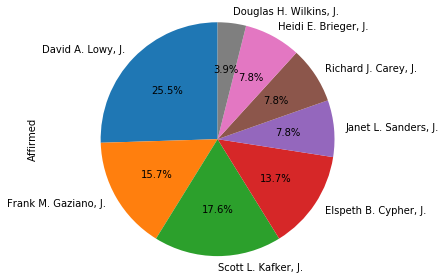

In [178]:
pie_chart(affirmed_series)

### Old affirmed percentages

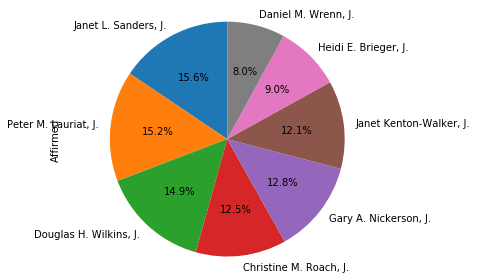

In [180]:
pie_chart(old_affirmed_series)

### New reversed percentages

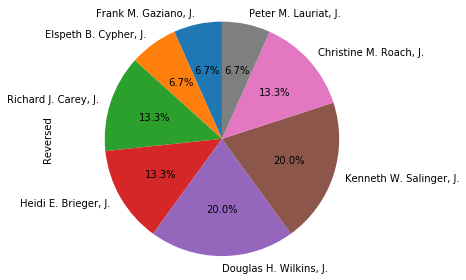

In [182]:
pie_chart(reversed_series)

### Old reversed percentages

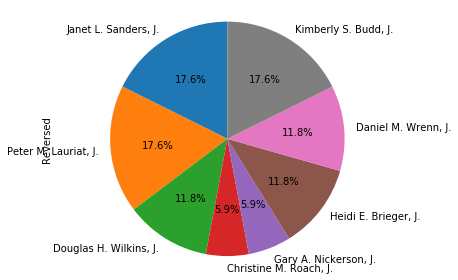

In [183]:
pie_chart(old_reversed_series)

### New partial percentages

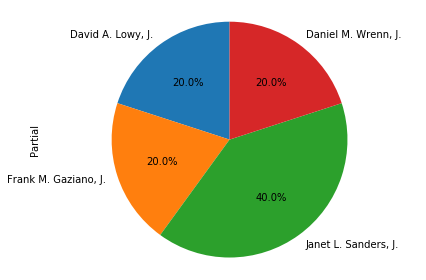

In [184]:
pie_chart(partial_series)

### Old partial percentages

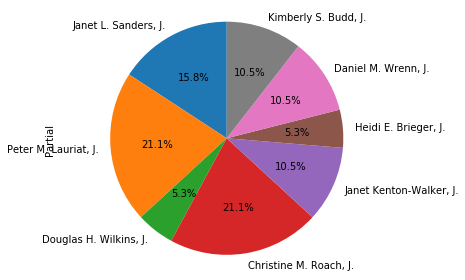

In [185]:
pie_chart(old_partial_series)